# CO$_2$ Activation on Single-Atom Alloys (SAAs)
This notebook aims to reproduce the main results of the paper "Rules Describing CO$_2$ Activation on Single-Atom Alloys from
DFT-meta-GGA Calculations and Artificial Intelligence". In particular, we show the results related to the Subgroup-Discovery (SGD) approach. The notebook is divided into four parts:
1. General Settings for the Analysis
2. Reading and Extraction of the SGD Results
3. Plotting the SGD Results
4. Rules and Data Points in the SGs

## 1. General Settings for the Analysis 

Here we will call the modules used in the notebook. Then, we will define a function to read the output provided by the realKD code, which is provided in a .json format. Finally, we will define additional information and settings before starting with the actual analysis. 

In [4]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import json
from matplotlib.colors import LinearSegmentedColormap

In [13]:
# Definitions prior to starting the analysis

# The color code for the host metals is "darkorchid" for Zn, "peru" for Cu, and "red" for Pd.
newcmp = mpl.colors.LinearSegmentedColormap.from_list("", ["darkorchid","peru","red"])

N = 3 # number of host metals in the dataset
cmap = newcmp
bounds = np.linspace(0,N,N+1)
nor = mpl.colors.BoundaryNorm(bounds, cmap.N)

In [14]:
# Function to read of the output data provided after running the SGD
def get_sg_info(data,index):
    """
    reads the SGD output .json file and returns the following information 
    on a specific identified SGs: coverage, utility function, target mean value within the SG,
                           the SG rules and the parameters enterning the rules attributes
    function arguments: data(str): path to the output .json file
                        index(int): index of the SG for which the information is obtained
                                    note that the SGs are ordered by decreasing quality-function values
    """
    coverage=data[index].get('measurements')[0].get('value')
    utility_function=data[index].get('measurements')[1].get('value')
    target_mean=data[index].get('descriptor').get('targetLocalModel').get('means')
    list_attributes=data[index].get('descriptor').get('selector').get('attributes')
    list_operators=[]
    list_cutoffs=[]
    constraints=[]
    for i in list(range(0,len(list_attributes))):
        list_operators.append(data[index].get('descriptor').get('selector').get('constraints')[i].get('type'))
        list_cutoffs.append(data[index].get('descriptor').get('selector').get('constraints')[i].get('value'))

    list_operators = [op.replace('lessOrEquals', '<=') for op in list_operators]
    list_operators = [op.replace('greaterOrEquals', '>=') for op in list_operators]
    list_operators = [op.replace('lessThan', '<') for op in list_operators]
    list_operators = [op.replace('greaterThan', '>') for op in list_operators]

    for i in list(range(0,len(list_attributes))):
        if i == 0:
            constraints=list_attributes[0]+list_operators[0]+str(list_cutoffs[0])
        else:
            constraints=constraints+' & '+list_attributes[i]+list_operators[i]+str(list_cutoffs[i])
    return(coverage,utility_function,*target_mean,constraints,list_attributes)

### Dataset and Output 

We will assume that the output/ folder and the .cvs file containing the CO$_2$ activation dataset are in the working directory. 

In [15]:
file_results='./output/normalized_positive_mean_shift/2024_01_10_17-44-16/results/normalized_positive_mean_shift_subgroup_analysis.json'
df=pd.read_csv('co2_activation_on_saa.csv').set_index('Site')

# The next line helps to plot the first five rows in the dataset
df.head(5)

,label_metal,E_ads,max_d_CO,min_d_CO,OCO_ang,PE_h,IP_h,EA_h,rs_h,rp_h,...,rval_sa,PE_site,IP_site,EA_site,PE_snn,IP_snn,EA_snn,CN,gen_CN,site_no
Site,,,,,,,,,,,,,,,,,,,,,
Zn_0001_Ir_sub_OCO_ontop_SA-C,0,-0.1472,0.1083,0.1083,124.19,1.65,9.394,0.0,1.105,0,...,0.6938,1.8333,9.2960,0.5217,1.6775,9.3793,0.0783,5.6667,7.2500,3
Zn_0001_Os_sub_OCO_ontop_SA-C,0,-0.1326,0.1170,0.1154,121.76,1.65,9.394,0.0,1.105,0,...,0.7191,1.8333,9.1627,0.3667,1.6775,9.3593,0.0550,5.6667,7.2500,3
Zn_0001_Os_sub_OCO_bridge_SA-C,0,-0.0056,0.0902,0.0703,136.00,1.65,9.394,0.0,1.105,0,...,0.7191,1.9250,9.0470,0.5500,1.6867,9.3477,0.0733,6.5000,7.3333,2
Zn_0001_Ru_sub_OCO_bridge_SA-C,0,-0.0140,0.0804,0.0630,138.23,1.65,9.394,0.0,1.105,0,...,0.6473,1.9250,8.3775,0.5250,1.6867,9.2585,0.0700,6.5000,7.3333,2
Zn_st_0001_Co_sub_OCO_bridge2-s_SA-C,0,-0.3787,0.0898,0.0890,134.17,1.65,9.394,0.0,1.105,0,...,0.3590,1.7650,8.6375,0.3305,1.6664,9.2859,0.0472,5.0000,5.5000,2


## 2. Reading and Extraction of the SGD Results

We'll use get_sg_info() to get the relevant information for all the SGs obtained after the SGD run. Additionally, we will identify the SGs in the Pareto front.

In [16]:
# Opening of the output data from the SGD run  
with open(file_results) as json_file:
    data = json.load(json_file)

    ## SG with maximum quality-function value
    sg_max_Q = get_sg_info(data,0)

    ## get the full coverage list and utility functions
    coverage_list = [get_sg_info(data,i)[0] for i in range(len(data))]
    utility_function_list = [get_sg_info(data,i)[1] for i in range(len(data))]

    ## SG with the maximum utility-function value
    max_utility=max(utility_function_list)
    list_index_max_utility_function_1=[i for i, j in enumerate(utility_function_list) if j == max_utility]
    sg_max_u=get_sg_info(data,list_index_max_utility_function_1[0])

    # Identify the points in the Pareto front with repeated elements, i.e.,
    # if SGD found two different selectors describing a given point in the 
    # Pareto front, all of them will be stored in pareto_coverage and 
    # pareto_utility lists 
    maxY = True
    sorted_list = sorted([[coverage_list[i], utility_function_list[i]] for i in range(len(coverage_list))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)

    pareto_coverage = [pair[0] for pair in pareto_front]
    pareto_utility  = [pair[1] for pair in pareto_front]
    
    # The following lines are intended to help in the visualization of 
    # the SGs in the Pareto front. In particular, the indices will allow 
    # to plot any SG in the Pareto front additional to max_u and max_Q 
    unique_pareto_utility = list(set(pareto_utility))
    unique_pareto_utility.sort(reverse=True)
    unique_pareto_index = []

    for i in unique_pareto_utility:
        unique_pareto_index.append(utility_function_list.index(i))

    ## Provide the index of the i-element in the Pareto front.
    ## Here, the additional SG will correspond to the 7th
    sg_2nd_Q = get_sg_info(data,unique_pareto_index[6])


## 3. Plotting the SGD Results

Here, we will reproduce three plots corresponding to those in Fig. 3(a),3(d), and 3(e). In particular, these plots correspond to:
1. 3(d)-Histogram corresponding to the target distributions in three SGs: the SG maximizing Q ($\sigma_{max(Q)}$), the SG maximizing u ($\sigma_{selected}$), and an additional SG that the user must define.
2. 3(e)-Scatter plot of the top-15,000 results found by SGD. The magenta points correspond to SGs located in the Pareto front. The blue, cyan, and green points correspond to $\sigma_{selected}$, $\sigma_{max(Q)}$, and the additional SG, respectively.
3. 3(a)-The CO$_2$ adsorption energy ($E_{ads}^{CO_2}$) against the C-O bond elongation ($\Delta d_{max}^{C-O}$). Here, the color code displays the host metal. The $\sigma_{selected}$ points are highlighted with a star. 

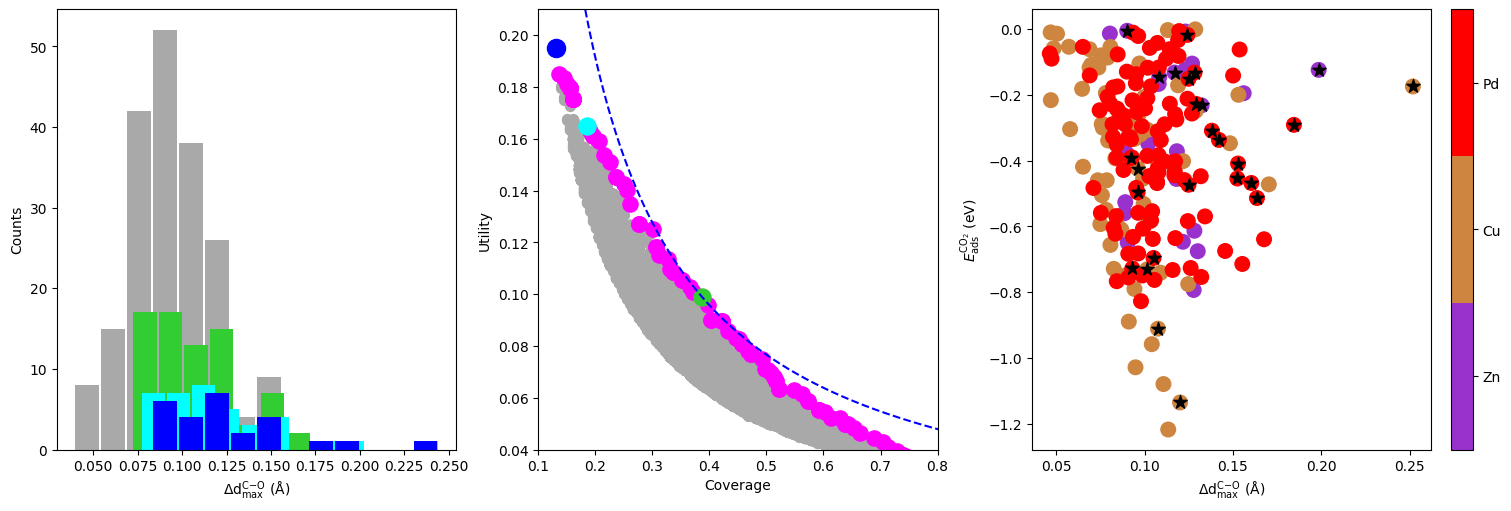

In [17]:
################ Plot of the results ####################

## Figure with three panels  
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3, constrained_layout=True, figsize=(15,5))

######------ First graph : Histograms
counts_delta_C_O, bins_delta_C_O = np.histogram(df['max_d_CO'],bins=14)
bins_width = (bins_delta_C_O[1] - bins_delta_C_O[0])/1.1
ax1.bar(bins_delta_C_O[:-1], counts_delta_C_O, width=bins_width, color='darkgrey')

ax1.set_ylabel('Counts')
ax1.set_xlabel('$\\Delta \mathrm{d}_{\mathrm{max}}^{\mathrm{C\\!-\\!O}}$ ($\mathrm{\AA}$)')

# SG maximizing Q
sg_Q = df.query(sg_max_Q[3])

# SG maximizing U
sg_U = df.query(sg_max_u[3])

# Additional SG
sg_2nd = df.query(sg_2nd_Q[3])

# Setting for plotting the SG maximizing Q
counts_max_Q, bins_max_Q = np.histogram(sg_Q['max_d_CO'],bins=12)
sg_Q_width = (bins_max_Q[1] - bins_max_Q[0])/1.1
ax1.bar(bins_max_Q[:-1], counts_max_Q, width=sg_Q_width, color='limegreen')

# Setting for plotting the additional SG
counts_additional, bins_additional = np.histogram(sg_2nd['max_d_CO'],bins=12)
additional_width = (bins_additional[1] - bins_additional[0])/1.1
ax1.bar(bins_additional[:-1], counts_additional, width=additional_width, color='cyan')

# Setting for plotting the SG maximizing u
sg_heights_3, sg_bins_3 = np.histogram(sg_U['max_d_CO'],bins=11)
sg_width_3 = (sg_bins_3[1] - sg_bins_3[0])/1.1
ax1.bar(sg_bins_3[:-1], sg_heights_3, width=sg_width_3, color='blue')

######------ Second graph : coverage .vs. utility
ax2.scatter(coverage_list,utility_function_list,c='darkgrey',s=50)

# Plot Pareto front SGs
ax2.scatter(pareto_coverage,pareto_utility,c='magenta',s=120)

# Plot the SG maximizing Q
ax2.scatter(sg_max_Q[0],sg_max_Q[1],c='limegreen',s=150)

# Plot the additional SG 
ax2.scatter(sg_2nd_Q[0],sg_2nd_Q[1],c='cyan',s=150)

# Plot the SG maximizing u
ax2.scatter(sg_max_u[0],sg_max_u[1],c='blue',s=170)

x = np.arange(0.005,1,0.001).tolist()

Q_max_function=[sg_max_Q[0]*sg_max_Q[1]/x[i] for i in range(len(x))]
ax2.plot(x,Q_max_function,c='blue',linestyle='dashed')

# x, y, ranges
ax2.set_xlim(0.10,0.8)
ax2.set_ylim(0.04,0.21)

# Axis labels 
ax2.set_ylabel('Utility')
ax2.set_xlabel('Coverage')

######------ Third graph : E_ads .vs. Delta_d_C-O 
cbar=plt.colorbar(ax3.scatter(df['max_d_CO'],df['E_ads'],c=df['label_metal'],cmap=cmap, norm=nor, s=110),
                  ticks=[0.5, 1.5, 2.5])

# Plot a mark on the points belonging to max_u SG
ax3.scatter(sg_U['max_d_CO'], sg_U['E_ads'],c='black',s=100, marker='*')

cbar.ax.set_yticklabels(['Zn','Cu','Pd'])
ax3.set_xlabel('$\\Delta \mathrm{d}_{\mathrm{max}}^{\mathrm{C\\!-\\!O}}$ ($\mathrm{\AA}$)')
ax3.set_ylabel('$E_{\mathdefault{ads}}^{\mathdefault{CO_2}}$ (eV)');

plt.show()

## 4. Rules and Data Points in the SGs

The last part of the notebook is devoted to printing the rules connected to the above-discussed SGs. Moreover, the labels of the points belonging to these SGs are printed as lists. 

In [22]:
################ Print the relevant information ####################

######------ PRINT data for max_Q
print()
print('SG with the maximum  $Q(SG,P)$:\n',
      '\nQ(SG,P)='"{:.3f}".format(sg_max_Q[0]*sg_max_Q[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_max_Q[0]),
      '\n u(SG,P)=', "{:.3f}".format(sg_max_Q[1]),
      '\n target average=', "{:.3f}".format(sg_max_Q[2]),
      '\n rules:',
       sg_max_Q[3])
print()

# Printing the data points of the SG as a list
sg_max_Q_data = sg_Q.index.tolist()
print(sg_max_Q_data)


SG with the maximum  $Q(SG,P)$:
 
Q(SG,P)=0.038 
 s(SG)/s(P)= 0.387 
 u(SG,P)= 0.099 
 target average= 0.118 
 rules: CN<=6.5 & EA_sa<=1.565 & IP_site>=8.06865 & PE_sa>=1.73

['Zn_0001_Ir_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_bridge_SA-C', 'Zn_0001_Ru_sub_OCO_bridge_SA-C', 'Zn_st_0001_Co_sub_OCO_bridge2-s_SA-C', 'Zn_st_0001_Co_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Co_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Co_sub_OCO_bridge1-s_fcc-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_fcc-s_SA-C', 'Zn_st_0001_Ni_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Ni_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Os_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Rh_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Rh_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Ru_sub_OCO_bridge3-s_SA-C', 'Zn_st_0001_Ru_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Ru_sub_OCO_bridge2-s_SA-C', 'Zn_st_0001_Ru_sub_OCO_bridge1-s_SA-C', 'Cu_111_Ir_sub_OCO_bridge_SA-C', 'Cu_111_Ir_sub_OCO_hcp_SA-

In [21]:
######------  PRINT data for max u 
print()
print('SG with the maximum  $u(SG,P)$:\n',
      '\nQ(SG,P)='"{:.3f}".format(sg_max_u[0]*sg_max_u[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_max_u[0]),
      '\n u(SG,P)=', "{:.3f}".format(sg_max_u[1]),
      '\n target average=', "{:.3f}".format(sg_max_u[2]),
      '\n rules:',
       sg_max_u[3])
print()

sg_U_data =  sg_U.index.tolist()

print()
# Printing the data points of the SG as a list
print(sg_U_data)


SG with the maximum  $u(SG,P)$:
 
Q(SG,P)=0.026 
 s(SG)/s(P)= 0.131 
 u(SG,P)= 0.195 
 target average= 0.132 
 rules: EA_site<=1.27515 & PE_site<=2.22335 & gen_CN>=5.8731 & rd_sa>0.6473


['Zn_0001_Ir_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_bridge_SA-C', 'Zn_st_0001_Ir_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_fcc-s_SA-C', 'Cu_111_Os_sub_OCO_bridge_SA-C', 'Cu_100_Os_sub_OCO_hollow_SA-C', 'Cu_100_Os_sub_OCO_bridge_SA-C', 'Cu_110_Os_sub_OCO_long_SA-C', 'Cu_110_Os_sub_OCO_long_SA-O', 'Pd_111_Ir_sub_OCO_bridge_SA-C', 'Pd_111_Ir_sub_OCO_bridge_SA-O', 'Pd_111_Os_sub_OCO_bridge_SA-O', 'Pd_111_Os_sub_OCO_bridge_SA-C', 'Pd_100_Ir_sub_OCO_bridge_SA-O', 'Pd_100_Ir_sub_OCO_ontop_SA-C', 'Pd_100_Os_sub_OCO_bridge_SA-O', 'Pd_100_Os_sub_OCO_ontop_SA-C', 'Pd_110_Ir_sub_OCO_long_SA-O', 'Pd_110_Ir_sub_OCO_long_SA-C', 'Pd_110_Ir_sub_OCO_hollow_SA-O', 'Pd_110_Os_sub_OCO_long_SA-C', 'Pd_211_Ir_subs_OCO_bridge3-s_SA-O', 'Pd_211_Os_subs_OCO_fcc-s_SA-O', 'Pd_211_Os_subs

In [20]:
######------ PRINT data additional SG
print()
print('Additional SG:\n',
      '\nQ(SG,P)='"{:.3f}".format(sg_2nd_Q[0]*sg_2nd_Q[1]),
      '\n s(SG)/s(P)=',"{:.3f}".format(sg_2nd_Q[0]),
      '\n u(SG,P)=', "{:.3f}".format(sg_2nd_Q[1]),
      '\n target average=', "{:.3f}".format(sg_2nd_Q[2]),
      '\n rules:',
       sg_2nd_Q[3])
print()

sg_2nd_data =  sg_2nd.index.tolist()

print()
print(sg_2nd_data)


Additional SG:
 
Q(SG,P)=0.031 
 s(SG)/s(P)= 0.186 
 u(SG,P)= 0.165 
 target average= 0.128 
 rules: EA_site<=1.1756000000000002 & rd_sa>0.6705 & site_no>=2.0


['Zn_0001_Ir_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_ontop_SA-C', 'Zn_0001_Os_sub_OCO_bridge_SA-C', 'Zn_st_0001_Ir_sub_OCO_ontop-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_bridge1-s_SA-C', 'Zn_st_0001_Ir_sub_OCO_fcc-s_SA-C', 'Zn_st_0001_Os_sub_OCO_ontop-s_SA-C', 'Cu_111_Os_sub_OCO_bridge_SA-C', 'Cu_100_Os_sub_OCO_bridge_SA-C', 'Cu_110_Os_sub_OCO_long_SA-C', 'Cu_110_Os_sub_OCO_long_SA-O', 'Cu_110_Os_sub_OCO_short_SA-C', 'Cu_211_Os_sub_OCO_bridge2-s_SA-C', 'Pd_111_Ir_sub_OCO_bridge_SA-C', 'Pd_111_Ir_sub_OCO_bridge_SA-O', 'Pd_111_Os_sub_OCO_bridge_SA-O', 'Pd_111_Os_sub_OCO_bridge_SA-C', 'Pd_100_Ir_sub_OCO_bridge_SA-O', 'Pd_100_Ir_sub_OCO_ontop_SA-C', 'Pd_100_Os_sub_OCO_bridge_SA-O', 'Pd_100_Os_sub_OCO_ontop_SA-C', 'Pd_110_Ir_sub_OCO_long_SA-O', 'Pd_110_Ir_sub_OCO_long_SA-C', 'Pd_110_Ir_sub_OCO_hollow_SA-O', 'Pd_110_Ir_sub_OCO_ontop_SA-C', 